#Part 1.2

##Librairies to import

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import spacy
nlp = spacy.load('en_core_web_sm')
import re

In [4]:
import pandas as pd

In [5]:
from collections import Counter

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [21]:
from statistics import mean

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.util import bigrams

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Data Analysis (text)

In [7]:
with open ("/content/drive/MyDrive/DataScience_Project/text_data.json", "r") as f :
  data = json.load(f)

In [6]:
data

{'Female_mathematicians': ["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n== Life ==\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks

Female mathematicians

###Vocabulary

In [8]:
texts = data["Female_mathematicians"]

In [9]:
new_texts = []
for text in texts :
  new_text = text.split("== References ==")[0]
  new_texts.append(new_text)

titles = re.compile(r'==+\s.+?\s==+')
for i in range(len(new_texts)) :
  to_remove = titles.findall(new_texts[i])
  for title in to_remove :
    new_texts[i] = new_texts[i].replace(title, "")

new_texts

["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks and Wildlife on Lord Howe Island, a

In [10]:
formulas = re.compile(r'\{\\displaystyle.+\}')
for i in range(len(new_texts)) :
  to_remove = formulas.findall(new_texts[i])
  for formula in to_remove :
    new_texts[i] = new_texts[i].replace(formula, "")
new_texts

["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks and Wildlife on Lord Howe Island, a

In [11]:
formulas = re.compile(r'\n {2}\n {4}\n.+?\n {4}\n {2}\n', re.DOTALL)
for i in range(len(new_texts)) :
  to_remove = formulas.findall(new_texts[i])
  for formula in to_remove :
    new_texts[i] = new_texts[i].replace(formula, "")
new_texts

["Mirka Miller (née Koutova, 9 May 1949 – 2 January 2016) was a Czech-Australian mathematician and computer scientist interested in graph theory and data security. She was a professor of electrical engineering and computer science at the University of Newcastle.\n\n\n\nMiller was born on 9 May 1949 in Rumburk, then part of Czechoslovakia, as the oldest in a family of five children. After attempting to escape Czechoslovakia in 1968, stopped because of her companion's illness, she became a student at Charles University before successfully escaping in 1969 and becoming a refugee in Australia.\nMiller earned a bachelor's degree from the University of Sydney in 1976, both in mathematics and computer science,\nand as a student also played volleyball for the New South Wales team and then the Australia women's national volleyball team.\nShe married ornithologist Ben Miller, became a computer programmer working with the Sydney Morning Herald and for NSW Parks and Wildlife on Lord Howe Island, a

In [55]:
#For statistics on the whole text corpus of one category, we put the texts together as one string

one_string = ""
for text in new_texts :
  one_string += text

In [105]:
sp_text = nlp(one_string)

In [129]:
#Removing stop words and ponctuation
words = [token for token in sp_text if token.is_stop != True and token.is_punct != True]

for i in range(len(words)) :
  words[i] = words[i].lower_

In [131]:
for word in words :
  if "\n" in word or word in (' ', '\u200a'):
    words.remove(word)
  try :
    int(word)
    words.remove(word)
  except :
    pass

In [132]:
len(words)

28627

In [133]:
def most_frequent(words):
    occurence_count = Counter(words)
    return occurence_count.most_common(50)

print(most_frequent(words))

[('university', 518), ('mathematics', 450), ('professor', 190), ('research', 165), ('mathematical', 157), ('theory', 148), ('work', 138), ('college', 121), ('mathematician', 112), ('school', 106), ('science', 104), ('women', 101), ('american', 100), ('time', 91), ('germain', 87), ('institute', 80), ('born', 78), ('society', 77), ('department', 76), ('sciences', 71), ('degree', 70), ('de', 66), ('equations', 64), ('dent', 64), ('association', 63), ('theorem', 63), ('new', 62), ('published', 60), ('year', 60), ('problem', 59), ('education', 59), ('function', 58), ('years', 57), ('systems', 57), ('computer', 56), ('earned', 56), ('dissertation', 55), ('later', 54), ('woman', 53), ('ergodic', 53), ('fellow', 52), ('died', 51), ('equation', 51), ('applied', 50), ('engineering', 49), ('student', 49), ('moved', 49), ('doctorate', 49), ('known', 49), ('faculty', 48)]


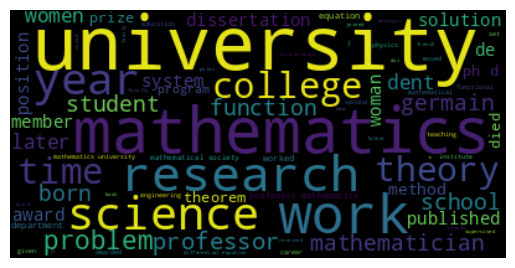

In [143]:
one_string2 = ""
for word in words :
  one_string2 += " "+word

wordcloud = WordCloud().generate(one_string2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Sentences

In [13]:
sent_count = []
for text in new_texts :
  sp_sents = nlp(text)
  count = 0
  for sentence in sp_sents.sents :
    count += 1
  sent_count.append(count)

sent_count

[21,
 74,
 28,
 9,
 13,
 5,
 14,
 103,
 38,
 13,
 7,
 10,
 11,
 16,
 26,
 15,
 17,
 4,
 8,
 44,
 12,
 10,
 8,
 9,
 34,
 9,
 3,
 31,
 7,
 15,
 9,
 19,
 22,
 13,
 16,
 17,
 7,
 9,
 41,
 22,
 19,
 27,
 206,
 20,
 12,
 26,
 16,
 7,
 19,
 17,
 125,
 7,
 8,
 8,
 107,
 9,
 16,
 14,
 35,
 5,
 24,
 63,
 40,
 158,
 7,
 74,
 57,
 14,
 22,
 14,
 32,
 13,
 32,
 14,
 9,
 10,
 48,
 43,
 10,
 27,
 6,
 10,
 19,
 11,
 10,
 19,
 6,
 25,
 50,
 8,
 36,
 7,
 10,
 10,
 8,
 23,
 38,
 19,
 22,
 8]

In [14]:
len(sent_count)

100

In [50]:
sent_df = pd.DataFrame({"FM_texts" : new_texts, "Sentence_count" : sent_count})
sent_df

,FM_texts,Sentence_count
0,"Mirka Miller (née Koutova, 9 May 1949 – 2 Janu...",21
1,"Irmgard Flügge-Lotz, née Lotz (16 July 1903 – ...",74
2,"Lai-Sang Lily Young (Chinese: 楊麗笙, born 1952) ...",28
3,Holly Krieger is a professor in mathematics at...,9
4,Lia Bronsard (b. 14 March 1963) is a Canadian ...,13
...,...,...
95,"Julia Kempe is a French, German, and Israeli r...",23
96,"Rachel Blodgett Adams (October 13, 1894–Januar...",38
97,Elisa Maria Eugenia Cibrario Cinquini (6 Septe...,19
98,"Artishia Garcia Wilkerson Jordan (August 12, 1...",22


In [22]:
print("""Female mathematicians:
Sentences min: %s,
Sentences max: %s,
Sentences average: %s
""" %(min(sent_count), max(sent_count), mean(sent_count)))

Female mathematicians:
Sentences min: 3,
Sentences max: 206,
Sentences average: 25.48



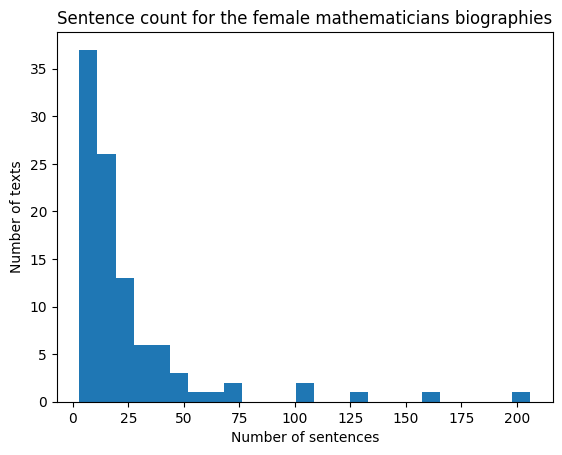

In [30]:
plt.hist(sent_count, bins=25)
plt.title("Sentence count for the female mathematicians biographies")
plt.xlabel("Number of sentences")
plt.ylabel("Number of texts")
plt.show()

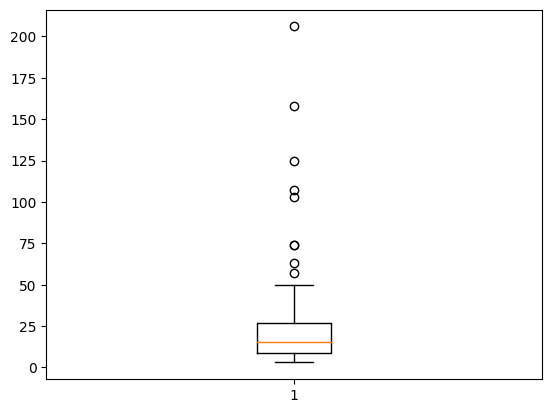

In [29]:
#The boxplot for the second category should be put on the same graph
plt.boxplot(sent_count)
plt.show()

###Tokens

In [56]:
sentences = nltk.sent_tokenize(one_string)

In [58]:
#GARDE-T-ON LA PONCTUATION POUR CETTE ANALYSE DES BIGRAMS ?

bigram_count = []
for sentence in sentences :
  tokens = nltk.word_tokenize(sentence)
  bigrams_list = list(nltk.bigrams(tokens))
  bigram_count.append(len(bigrams_list))

bigram_count

[28,
 15,
 24,
 34,
 43,
 34,
 38,
 13,
 13,
 30,
 38,
 16,
 8,
 16,
 9,
 34,
 65,
 53,
 22,
 45,
 9,
 21,
 39,
 28,
 11,
 25,
 16,
 40,
 27,
 18,
 22,
 11,
 18,
 18,
 14,
 22,
 24,
 26,
 31,
 22,
 31,
 29,
 20,
 30,
 18,
 36,
 54,
 35,
 18,
 34,
 19,
 20,
 28,
 16,
 33,
 16,
 42,
 36,
 21,
 27,
 49,
 36,
 30,
 25,
 19,
 12,
 11,
 51,
 23,
 17,
 29,
 24,
 33,
 22,
 26,
 35,
 29,
 25,
 11,
 32,
 26,
 27,
 38,
 9,
 35,
 30,
 20,
 15,
 53,
 7,
 5,
 2,
 74,
 21,
 30,
 29,
 34,
 39,
 10,
 14,
 38,
 13,
 17,
 26,
 28,
 23,
 13,
 27,
 17,
 38,
 1,
 18,
 7,
 9,
 34,
 37,
 42,
 32,
 44,
 19,
 21,
 24,
 16,
 15,
 31,
 26,
 35,
 25,
 64,
 39,
 4,
 17,
 9,
 17,
 16,
 5,
 32,
 24,
 10,
 9,
 14,
 201,
 8,
 11,
 15,
 8,
 25,
 21,
 12,
 39,
 29,
 17,
 28,
 56,
 25,
 35,
 46,
 11,
 45,
 32,
 18,
 26,
 54,
 22,
 42,
 17,
 46,
 29,
 9,
 8,
 14,
 16,
 41,
 46,
 15,
 25,
 23,
 18,
 46,
 10,
 16,
 50,
 11,
 35,
 26,
 37,
 40,
 103,
 30,
 35,
 19,
 17,
 17,
 17,
 40,
 22,
 29,
 20,
 21,
 19,
 40,
 31,
 48,
 

In [59]:
bigrams_df = pd.DataFrame({"FM_sentences" : sentences, "Bigram_count" : bigrams})
bigrams_df

,FM_sentences,Bigram_count
0,"Mirka Miller (née Koutova, 9 May 1949 – 2 Janu...",28
1,She was a professor of electrical engineering ...,15
2,"Miller was born on 9 May 1949 in Rumburk, then...",24
3,After attempting to escape Czechoslovakia in 1...,34
4,Miller earned a bachelor's degree from the Uni...,43
...,...,...
2568,"Her doctoral dissertation, Entropy Numbers and...",30
2569,"In 2018, she was given a chair for function sp...",24
2570,Haroske is the author of the book Envelopes an...,21
2571,With Hans Triebel she also wrote Distributions...,25


In [60]:
print("""Female mathematicians:
Bigram count per sentence min: %s,
Bigram count per sentence max: %s,
Bigram count per sentence average: %s,
Total bigram number: %s
""" %(min(bigram_count), max(bigram_count), mean(bigram_count), sum(bigram_count)))

Female mathematicians:
Bigram count per sentence min: 1,
Bigram count per sentence max: 266,
Bigram count per sentence average: 22.950641274776526,
Total bigram number: 59052



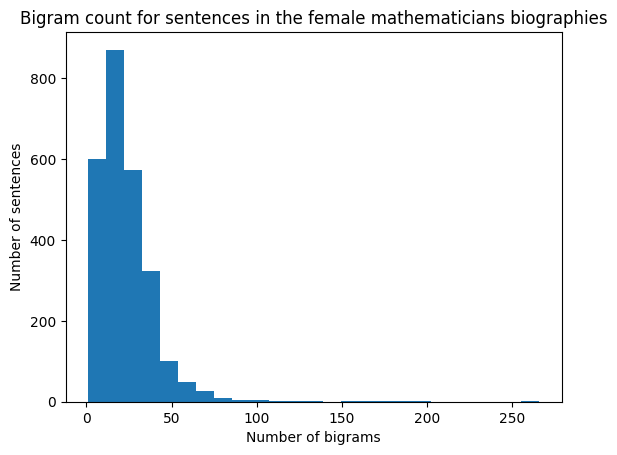

In [61]:
plt.hist(bigram_count, bins=25)
plt.title("Bigram count for sentences in the female mathematicians biographies")
plt.xlabel("Number of bigrams")
plt.ylabel("Number of sentences")
plt.show()

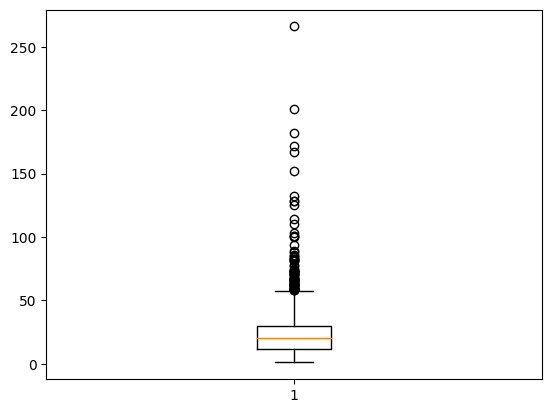

In [62]:
#The boxplot for the second category should be put on the same graph
plt.boxplot(bigram_count)
plt.show()